In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from unicodedata import normalize
%matplotlib inline

In [2]:
df = pd.read_excel('all.xls')

## Count publications for ech kaf in each quartile

In [3]:
def get_elements(regex, string, default='N/A'):
    #Returns a list of substrings that match the regex attribute
    try: 
        result = re.findall(regex, string)
    except TypeError:
        result = [default,]
    return result

In [9]:
kafs_regex = '[0-9][0-9][0-9]|[0-9][0-9][0-9][0-9]|Нет данных об авторе'

def make_list(regex, data_frame, label):
    #Returns a list of unique elements matching the regex and 
    #pesented in all rows of specified coloumn (label) of the data_frame
    seq = []
    for field in data_frame[label]:
        elements = get_elements(regex, field)
        for el in elements:
            try:
                seq.index(el)
            except ValueError:
                seq.append(el)            
    return seq

def make_dict(regex, data_frame, label, init=0):
    kaf_seq = make_list(regex, data_frame, label)
    unique_kaf_dict = dict.fromkeys(kaf_seq, init)
    return unique_kaf_dict

In [10]:
def count_by_quartile(data_frame, quartile, label='Kaf'):
    #returns a dict for Q with publications amount for each kaf
    unique_kaf_dict = make_dict(kafs_regex, df, label='Kaf')
    for idx,row in enumerate(data_frame[label]):
        if data_frame['Quartile'][idx]==quartile: 
            kafs_found = get_elements(kafs_regex, row)
            for category in unique_kaf_dict.keys():
                try:
                    kafs_found.index(category)
                except ValueError:
                    {}
                else:
                    unique_kaf_dict[category] += 1
    return unique_kaf_dict

In [11]:
quartile_regex = 'Q[1-4]|Нет квартиля'

def make_dict_by_quartiles(regex, data_frame):
    #Returns a dictionary where keys are the 'Quartile' values 
    #found in data_frame.
    #Values of the returned dict are dicts of counted publications 
    #for corresponding quartile
    result = {}
    seq = make_list(regex, data_frame, label='Quartile')
    for quartile in seq:
        result[quartile] = count_by_quartile(data_frame, quartile)
    return result

publications = make_dict_by_quartiles(quartile_regex, df)

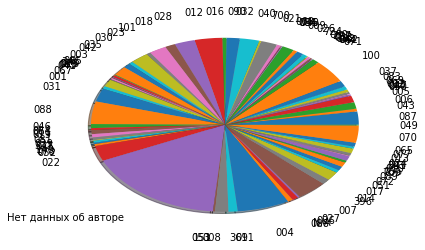

In [12]:
fig = plt.figure()

quartile = 'Q4'
plot = plt.pie(list(publications[quartile].values()), labels=publications[quartile].keys(), shadow=True, labeldistance=1.3)

## Count number of interactions between kafs


In [17]:
kafs_regex = '[0-9][0-9][0-9]|[0-9][0-9][0-9][0-9]'
def is_presented(list_to_inspect, kaf_to_find):
    try:
        list_to_inspect.index(kaf_to_find)
    except ValueError:
        return False
    else:
        return True

def count_unique_elements_for(kaf):
    result_dict = make_dict(kafs_regex, df, 'Kaf')
    for row in df['Kaf']:
        kafs_found = get_elements(kafs_regex, row)
        if is_presented(kafs_found, kaf):
            for category in result_dict.keys():
                result_dict[category] += 1*is_presented(kafs_found, category)
    return result_dict

def count_interactions(data_frame, label):
    # Returns a dict of dicts with number of interactions with each kaf
    kaf_dict = make_dict(kafs_regex, df, label='Kaf')
    for kaf in kaf_dict.keys():
        kaf_dict[kaf] = count_unique_elements_for(kaf)
        delete_NA = kaf_dict[kaf].pop('N/A')
    return kaf_dict

result = count_interactions(df, 'Kaf')

## Writing results itno xls file

In [28]:
result = pd.DataFrame(result)
result.to_csv('result.csv')